# Regressão Linear com Zombie Health

Importando o arquivo CSV com o Pandas.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zombie-health-age-days-recovery.csv')
df.head(10)

,name,age,days_recovery
0,Rot Donnadd,43,9
1,Pid Mught,38,7
2,Thulk Lebbimp,63,10
3,Bouvossam Damme,71,13
4,Pirg Zall,48,7
5,Nullon Rackindock,23,5
6,Shor Splitturch,35,7
7,Ger Ackeng,66,11
8,Gleldo Shruck,45,8
9,Nadross Pilch,60,8


## Scatter plot da Idade x Dias de Recuperação

<AxesSubplot:xlabel='age', ylabel='days_recovery'>

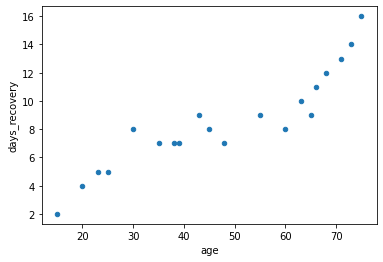

In [15]:
df.plot.scatter(x='age', y='days_recovery')

## Estimando a Regressão Linear usando Least Squares

In [4]:
from scipy import stats
x = df['age']
y = df['days_recovery']
a, b, r, p, std_err = stats.linregress(x, y)

## Plotando a função linear estimada x dados da amostra

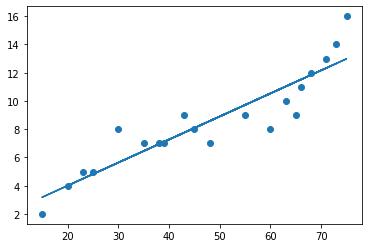

In [12]:
def estimate_y(x):
  return a * x + b

df['y_estimated'] = df['age'].apply(estimate_y)

plt.figure()
plt.plot(df['age'], df['y_estimated'])
plt.scatter(df['age'], df['days_recovery'])
plt.show()

## Calculando o R2

In [16]:
print("R-squared: %f" % r**2)

R-squared: 0.836479


In [6]:
from statsmodels.formula.api import ols

model = ols("age ~ days_recovery", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     92.08
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.68e-08
Time:                        16:25:22   Log-Likelihood:                -68.919
No. Observations:                  20   AIC:                             141.8
Df Residuals:                      18   BIC:                             143.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.0776      4.900      0.832      0.416      -6.217      14.372
days_recovery     5.1196      0.534      9.596      0.000       3.999       6.240
==============================================================================
Omnibus:                        0.363   Durbin-Watson:                   2.316
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.278
Skew:                           0.250   Prob(JB):                        0.870
Kurtosis:                       2.710   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
y_pred = model.predict(df['age'])
print(y_pred)

ValueError: shapes (20,2) and (20,) not aligned: 2 (dim 1) != 20 (dim 0)